# Pandas Tutorial

### Importing libraries

Use *pip install pandas* or *conda install pandas*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Basic Syntax

#### Series

Series are essentially a column in a table. It can have a title and custom indices

In [2]:
series = pd.Series([20,21,300], name='numbers')
series

0     20
1     21
2    300
Name: numbers, dtype: int64

It can be spliced like a list in python

In [3]:
series[0]

20

In [5]:
series[0:2] # this will create another series

0    20
1    21
Name: numbers, dtype: int64

#### The dataframe

In [6]:
data = {"a":[1,2,3], "b":[4,5,6], "c":[7,8,9]} # this is known as a dictionary
df = pd.DataFrame(data)
df

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


In [8]:
col_df = pd.concat([series, df], axis=0)
col_df

,0,a,b,c
0,20.0,NaN,NaN,NaN
1,21.0,NaN,NaN,NaN
2,300.0,NaN,NaN,NaN
0,NaN,1.0,4.0,7.0
1,NaN,2.0,5.0,8.0
2,NaN,3.0,6.0,9.0


In [10]:
new_row = pd.DataFrame([[13,14,15]], columns=['a','b','c'])
new_row


,a,b,c
0,13,14,15


In [22]:
row_df = pd.concat([df, new_row], axis=0)
row_df

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9
0,13,14,15


In [15]:
row_df.reset_index(drop=True,inplace=True)
row_df

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9
3,13,14,15


In [17]:
names = ["ab", "cd", "ef", "gh"]
row_df["Names"] = names
row_df

,a,b,c,Names
0,1,4,7,ab
1,2,5,8,cd
2,3,6,9,ef
3,13,14,15,gh


In [18]:
row_df.drop(["a","b"],axis=1,inplace=True)
row_df

,c,Names
0,7,ab
1,8,cd
2,9,ef
3,15,gh


In [ ]:
row_df.rename(columns={"c":"Age"},inplace=True)
row_df

,Age,Names
0,7,ab
1,8,cd
2,9,ef
3,15,gh


*Exercise 1: Add your name and age to row_df as a new row*

In [ ]:
new_row1 = pd.DataFrame([[20,"Kimi"]], columns=["Age", "Names"])
new_df = pd.concat([row_df, new_row1], axis=0)
new_df

,Age,Names
0,7,ab
1,8,cd
2,9,ef
3,15,gh
0,20,Kimi


*Exercise 2: Add a new column called 'Surname', with a made up surname for each character*

In [24]:
sur = ["aa", "bb", "cc", "dd", "ee"]
new_df["Surname"] = sur
new_df

,Age,Names,Surname
0,7,ab,aa
1,8,cd,bb
2,9,ef,cc
3,15,gh,dd
0,20,Kimi,ee


In [ ]:
assert(len(sur) == len(new_df.))

AttributeError: 'DataFrame' object has no attribute 'row'

#### External data

The head of all dataframes is taken for easier viewing

In [34]:
# for google colab
# real_estate = pd.read_csv("/content/real_estate.csv")

# for jupyter notebook
real_estate = pd.read_csv("real_estate.csv")

C:\Users\billy\AppData\Local\Temp\ipykernel_13880\823095863.py:5: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  real_estate = pd.read_csv("real_estate.csv")


In [35]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     997213 non-null  int64  
 1   List Year         997213 non-null  int64  
 2   Date Recorded     997211 non-null  object 
 3   Town              997213 non-null  object 
 4   Address           997162 non-null  object 
 5   Assessed Value    997213 non-null  float64
 6   Sale Amount       997213 non-null  float64
 7   Sales Ratio       997213 non-null  float64
 8   Property Type     614767 non-null  object 
 9   Residential Type  608904 non-null  object 
 10  Non Use Code      289681 non-null  object 
 11  Assessor Remarks  149864 non-null  object 
 12  OPM remarks       9934 non-null    object 
 13  Location          197697 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 106.5+ MB


In [36]:
real_estate.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,9.972130e+05,997213.000000,9.972130e+05,9.972130e+05,9.972130e+05
mean,4.311864e+05,2010.189829,2.791437e+05,3.911512e+05,1.044637e+01
std,6.549219e+06,6.237877,1.670610e+06,5.347270e+06,1.890192e+03
min,0.000000e+00,2001.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.044400e+04,2004.000000,8.760000e+04,1.400000e+05,4.867000e-01
50%,7.030300e+04,2010.000000,1.383900e+05,2.250000e+05,6.246000e-01
75%,1.518780e+05,2016.000000,2.255600e+05,3.650000e+05,7.852761e-01
max,2.000500e+09,2020.000000,8.815100e+08,5.000000e+09,1.226420e+06


In [37]:
real_estate.describe(include='all')

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
count,9.972130e+05,997213.000000,997211,997213,997162,9.972130e+05,9.972130e+05,9.972130e+05,614767,608904,289681,149864,9934,197697
unique,NaN,NaN,6387,170,714371,NaN,NaN,NaN,11,5,106,66508,4825,130529
top,NaN,NaN,07/01/2005,Bridgeport,MULTI ADDRESSES,NaN,NaN,NaN,Single Family,Single Family,25 - Other,ESTATE SALE,GOOD SALE PER MLS,POINT (-72.36336 41.97461)
freq,NaN,NaN,877,34201,620,NaN,NaN,NaN,401612,445016,59916,5044,978,181
mean,4.311864e+05,2010.189829,NaN,NaN,NaN,2.791437e+05,3.911512e+05,1.044637e+01,NaN,NaN,NaN,NaN,NaN,NaN
std,6.549219e+06,6.237877,NaN,NaN,NaN,1.670610e+06,5.347270e+06,1.890192e+03,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,2001.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.044400e+04,2004.000000,NaN,NaN,NaN,8.760000e+04,1.400000e+05,4.867000e-01,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.030300e+04,2010.000000,NaN,NaN,NaN,1.383900e+05,2.250000e+05,6.246000e-01,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.518780e+05,2016.000000,NaN,NaN,NaN,2.255600e+05,3.650000e+05,7.852761e-01,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
 #returns the number of null values in each column
 real_estate.isna().sum()

Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    388309
Non Use Code        707532
Assessor Remarks    847349
OPM remarks         987279
Location            799516
dtype: int64

In [39]:
 #returns the first 5 rows
real_estate.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.5957,Residential,Single Family,NaN,NaN,NaN,NaN


In [47]:
#columns can be accessed by name
real_estate[["Serial Number", "List Year", "Date Recorded"]].head()

,Serial Number,List Year,Date Recorded
0,2020348,2020,09/13/2021
1,20002,2020,10/02/2020
2,200212,2020,03/09/2021
3,200243,2020,04/13/2021
4,200377,2020,07/02/2021


In [43]:
real_estate["Serial Number"].head()

0    2020348
1      20002
2     200212
3     200243
4     200377
Name: Serial Number, dtype: int64

In [46]:
 #or using iloc
 real_estate.iloc[0:, 0:2].head()

,Serial Number,List Year
0,2020348,2020
1,20002,2020
2,200212,2020
3,200243,2020
4,200377,2020


In [49]:
 #iloc is used to select rows and columns by their index location
 real_estate.iloc[0,1]

2020

In [51]:
real_estate["List Year"] == 2020

0          True
1          True
2          True
3          True
4          True
          ...  
997208    False
997209    False
997210    False
997211    False
997212    False
Name: List Year, Length: 997213, dtype: bool

In [50]:
 #selecting rows based on a condition
 real_estate[real_estate["List Year"] == 2020].head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.5957,Residential,Single Family,NaN,NaN,NaN,NaN


In [52]:
 #selecting a column based on a condition
real_estate["Town"][real_estate["List Year"] == 2020].head()

0    Ansonia
1    Ashford
2       Avon
3       Avon
4       Avon
Name: Town, dtype: object

*Exercise 3: Show the address of all commercial properties*

*Exercise 4: Show all data for properties that are in Avon*

*Exercise 5: Show the first 10 rows of the sales ratio and the address in one dataframe*

In [53]:
 #returns the unique values in a column
 real_estate["Property Type"].unique()

array(['Commercial', 'Residential', 'Vacant Land', nan, 'Apartments',
       'Industrial', 'Public Utility', 'Condo', 'Two Family',
       'Three Family', 'Single Family', 'Four Family'], dtype=object)

In [54]:
 #returns the number of times each unique value appears in a column
 real_estate["Property Type"].value_counts()

Property Type
Single Family     401612
Condo             105420
Residential        60728
Two Family         26408
Three Family       12586
Vacant Land         3163
Four Family         2150
Commercial          1981
Apartments           486
Industrial           228
Public Utility         5
Name: count, dtype: int64

In [55]:
 #selecting rows where a column is null
 real_estate[real_estate["Non Use Code"].isna()].head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.5957,Residential,Single Family,NaN,NaN,NaN,NaN


In [56]:
 #selecting rows where a column is not null

real_estate[~real_estate["Non Use Code"].isna()].head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
6,2020180,2020,03/01/2021,Berlin,1539 FARMINGTON AVE,234200.0,130000.0,1.8015,Residential,Two Family,08 - Part Interest,NaN,NaN,NaN
18,201212,2020,08/23/2021,Bristol,8 JENNINGS TERR,88060.0,91000.0,0.9676,Residential,Single Family,14 - Foreclosure,FORECLOSURE SALE OUT OF BANK,NaN,NaN
24,2000330,2020,05/20/2021,Cheshire,844 HIGHLAND AVE,144220.0,204000.0,0.7069,Residential,Single Family,25 - Other,DEFERRED MAINTENANCE,NaN,NaN
39,201018,2020,06/03/2021,Danbury,55 FOREST AV,136900.0,150000.0,0.9126,Residential,Single Family,01 - Family,FAMILY TRANSFER / I11200,NaN,NaN
45,20013,2020,12/16/2020,Eastford,GENERAL LYON RD,2200.0,20000.0,0.1100,Vacant Land,NaN,12 - Non Buildable Lot,UNBLDBL,NaN,NaN


In [ ]:
 #selecting rows where a column is not equal to a value
#REMEMBER BRACKETS
real_estate[(real_estate["List Year"] == 2020) | (real_estate["List Year"] == 2021)].head()

# | or
# & and


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.5957,Residential,Single Family,NaN,NaN,NaN,NaN


In [64]:
filter = real_estate["List Year"].isin([2020, 2021])

In [65]:
 #selecting rows where a column is equal to any value in a list
 real_estate[filter]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.695800,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.595700,Residential,Single Family,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66827,20200144,2020,11/04/2020,Stratford,66 ACADEMY HILL TERRACE,213150.0,379000.0,0.562400,Residential,Single Family,NaN,NaN,NaN,NaN
66828,200605,2020,12/11/2020,Waterbury,1103 COOKE ST,66210.0,158000.0,0.419000,Residential,Single Family,NaN,NaN,NaN,NaN
66829,200547,2020,12/01/2020,Waterbury,45 DEERWOOD LANE #45-2,28100.0,30000.0,0.936667,Residential,Condo,25 - Other,PRIVATE SALE,NaN,POINT (-73.03103 41.59294)
66830,200622,2020,04/29/2021,Torrington,21 PROSPECT ST UNIT 3,40190.0,52500.0,0.765500,Residential,Condo,NaN,NaN,NaN,POINT (-73.12447 41.79805)


*Exercise 6: What will the following code return:*

real_estate[real_estate['List Year']==2020]

*Exercise 7: How many addresses are null?*

*Exercise 8: What will the following code return:*

real_estate['Property Type'][real_estate['Residential Type']=='Two Family'].unique()

*Exercise 9: What will the following code return:*

real_estate[real_estate['Residential Type']=='Single Family'][real_estate['Property Type'].isin(twofam)]['Property Type'].unique()

*Exercise 10: Find how many unique towns are in the dataset*

*Exercise 11: Find how many towns have a condo for sale and not a four family house (hint: revise how to use ".isin()")*

In [66]:
real_estate["List Year"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 997213 entries, 0 to 997212
Series name: List Year
Non-Null Count   Dtype
--------------   -----
997213 non-null  int64
dtypes: int64(1)
memory usage: 7.6 MB


In [68]:
 #changing the data type of a column
real_estate["List Year"] = real_estate["List Year"].astype("str")
real_estate["List Year"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 997213 entries, 0 to 997212
Series name: List Year
Non-Null Count   Dtype 
--------------   ----- 
997213 non-null  object
dtypes: object(1)
memory usage: 7.6+ MB


In [69]:
string_list = pd.Series(["Hello", "World", "!"])
string_list

0    Hello
1    World
2        !
dtype: object

In [70]:
string_list.str.replace("l","w")

0    Hewwo
1    Worwd
2        !
dtype: object

In [ ]:
numbers = pd.Series([1,2,3,4,5,10])
numbers.apply(np.sqrt)

0    1.000000
1    1.414214
2    1.732051
3    2.000000
4    2.236068
5    3.162278
dtype: float64

#### Visualisation

Text(0.5, 1.0, 'fig 1')

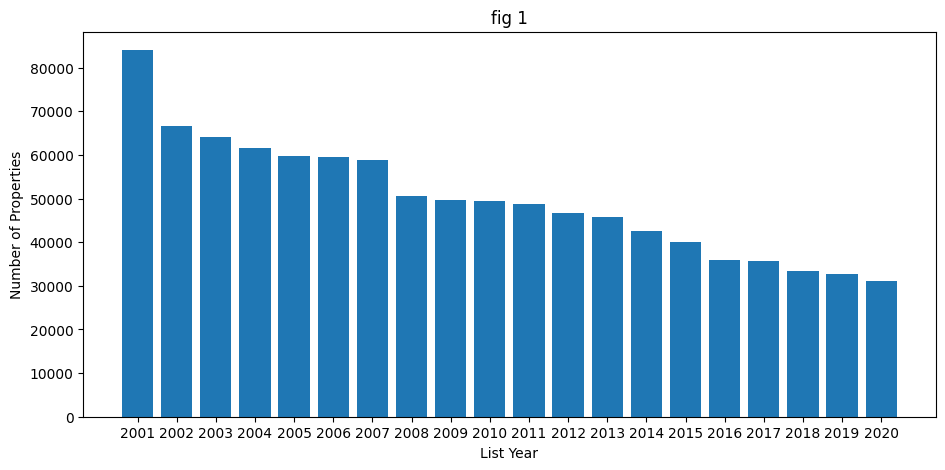

In [76]:
#creating bar charts
plt.figure(figsize=[11,5])
plt.bar(real_estate["List Year"].sort_values().unique().astype(str), real_estate["List Year"].value_counts())
plt.xlabel("List Year")
plt.ylabel("Number of Properties")
plt.title("fig 1")


#sort_values() sorts the years in ascending order
#astype(str) converts the years to strings
#unique() returns the unique years
#value_counts() counts the number of times each year appears in the series

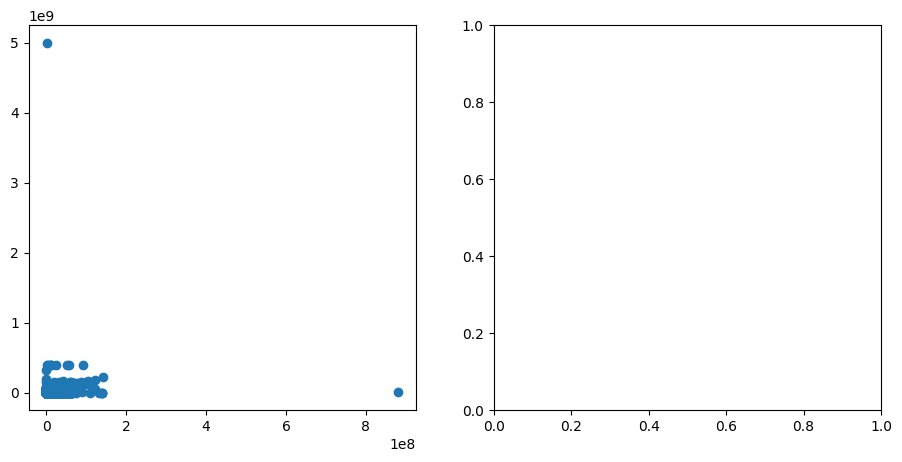

In [78]:
#plotting two scatterplots side by side
plt.figure(figsize=[11,5])
plt.subplot(1,2,1)

plt.scatter(real_estate["Assessed Value"], real_estate["Sale Amount"])

plt.subplot(1,2,2)
assessed = real_estate["Assessed Value"][(real_estate["Sale Amount"] < 1000000000)]
sale = real_estate["Sale Amount"][(real_estate["Sale Amount"] < 1000000000)]
#remove outliers
